In [85]:
import numpy as np
from scipy.optimize import minimize
from numpy.linalg import inv
import matplotlib.pyplot as plt

In [86]:
np.random.seed(13)

X_binomial = np.random.normal(size=100)
intercept = np.ones(X_binomial.shape)

X_binomial_w_intercept = np.column_stack((intercept, X_binomial))

true_beta = np.array([-1,2])

logits = np.dot(X_binomial_w_intercept, true_beta)
prob = 1/ (1 + np.exp(-logits))

Y_binomial = np.random.binomial(1,prob)

# Y ~ Binomial(p)
# g(p) = b0 * 1 + b1 * X

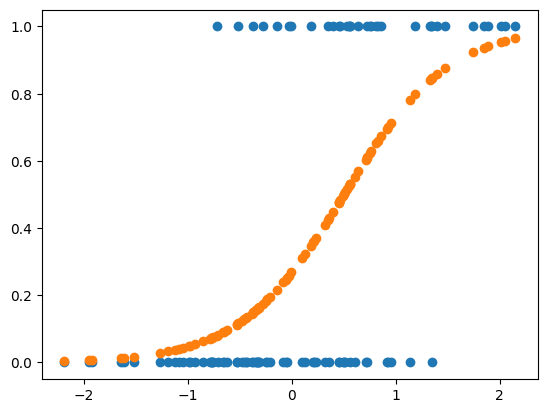

In [87]:
fig, ax = plt.subplots()
ax.plot(X_binomial, Y_binomial, "o")
ax.plot(X_binomial, prob, "o")

In [88]:
def neg_log_likelihood_binomial(beta, X, Y):
    logits = np.dot(X, beta)
    nll = -np.sum(Y * logits - np.log(1+ np.exp(logits)))
    return nll

In [89]:
initial_beta = np.zeros(X_binomial_w_intercept.shape[1])
res_binomial = minimize(neg_log_likelihood_binomial, initial_beta, args=(X_binomial_w_intercept, Y_binomial))


In [90]:
x_range_binomial = np.linspace(X_binomial.min(), X_binomial.max(), 300)
log_fit = 1 / (1 + np.exp(-(res_binomial.x[0] + res_binomial.x[1] * x_range_binomial)))

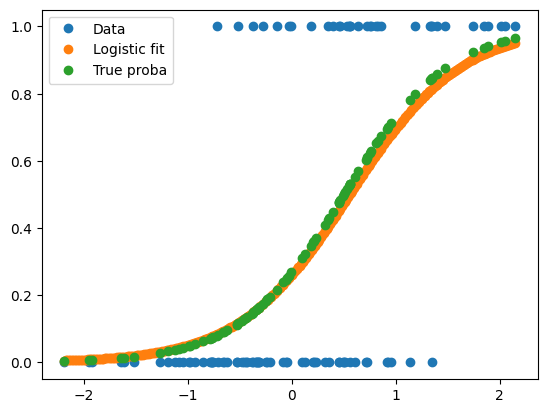

In [91]:
fig, ax = plt.subplots()
ax.plot(X_binomial, Y_binomial, "o", label = "Data")
ax.plot(x_range_binomial, log_fit, "o", label = "Logistic fit")
ax.plot(X_binomial, prob, "o", label = "True proba")
plt.legend()

OTRO EJEMPLO

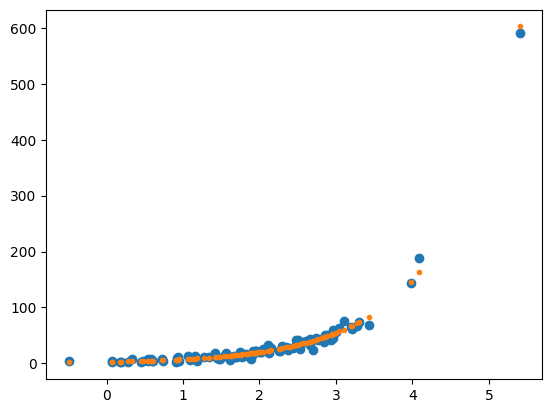

In [92]:
X_poisson = np.random.normal(2,1,100)
intercept = np.ones(X_poisson.shape)
X_poisson_w_intercept = np.column_stack((intercept, X_poisson))
true_beta = np.array([1,1])
lambda_ = np.exp(np.dot(X_poisson_w_intercept, true_beta))
Y_poisson = np.random.poisson(lambda_)

fig, ax = plt.subplots()
ax.plot(X_poisson, Y_poisson, "o")
ax.plot(X_poisson, lambda_, ".")

In [93]:
def neg_log_likelihood_poisson(beta, X, Y):
    lambda_ = np.exp(np.dot(X, beta))
    return -np.sum(Y*np.log(lambda_) - lambda_)

In [94]:
initial_beta = np.zeros(X_poisson_w_intercept.shape[1])
res_poisson = minimize(neg_log_likelihood_poisson, initial_beta, args = (X_poisson_w_intercept, Y_poisson))

x_range_poisson = np.linspace(X_poisson.min(),X_poisson.max(), 300 )
poisson_fit = np.exp(res_poisson.x[0] + res_poisson.x[1] * x_range_poisson)

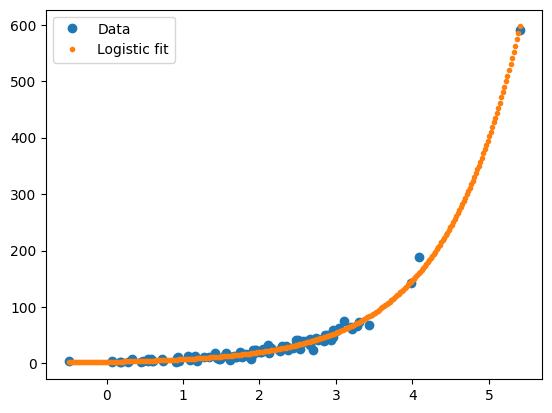

In [96]:
fig, ax = plt.subplots()
ax.plot(X_poisson, Y_poisson, "o", label = "Data")
ax.plot(x_range_poisson, poisson_fit, ".", label = "Logistic fit")
plt.legend()